<img src="../images/demos/FIUM.png" width="350px" class="pull-right" style="display: inline-block">

**ViA / Grado IngInf**<br>
curso 2017-18<br>
*[Alberto Ruiz](http://dis.um.es/profesores/alberto)*

---

# machine learning

En este notebook vamos a experimentar con métodos de reconocimiento de patrones sencillos que consiguen resultados aceptables.

## scikit-learn

Los algoritmos se podrían programar de cero si tuviéramos un poco más de tiempo. En nuestro caso es preferible practicar con la excelente biblioteca [scikit-learn](http://scikit-learn.org/stable/).

Es muy sencilla de usar. Por ejemplo, para entrenar un árbol de decisión con el clásico problema de clasificación de flores [IRIS](https://en.wikipedia.org/wiki/Iris_flower_data_set), se hace lo siguiente:

In [1]:
from sklearn import datasets

dataset = datasets.load_iris()

In [2]:
# dataset.keys()

In [3]:
# print(dataset['DESCR'])

Entrenamos un [árbol de decisión](https://en.wikipedia.org/wiki/Decision_tree_learning) con una parte de los ejemplos, reservando el resto para evaluar su calidad.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

(train_data  , test_data, 
 train_labels, test_labels) = train_test_split(dataset.data, dataset.target)

model = DecisionTreeClassifier()
model.fit(train_data, train_labels)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Ya podemos clasificar casos nuevos:

In [5]:
model.predict([ [6 , 3 , 3 , 1.5] ])

array([1])

Un objeto con ese vector de atributos se clasifica dentro de la clase 1, que corresponde a la flor *Iris- Versicolour*.

Finalmente, evaluamos la calidad del modelo obtenido con los ejemplos de test.

In [6]:
from sklearn import metrics

expected = test_labels
predicted = model.predict(test_data)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.93      0.87      0.90        15
          2       0.83      0.91      0.87        11

avg / total       0.92      0.92      0.92        38

[[12  0  0]
 [ 0 13  2]
 [ 0  1 10]]


El resultado depende de la partición aleatoria de los ejemplos, pero normalmente se clasifican casi todos bien. En realidad es un problema de clasificación muy sencillo.

## MNIST dataset

Nuestro objetivo es construir un sistema que reconozca números manuscritos en imágenes tomadas con una cámara. Para ello vamos a aprovechar la conocida base de datos MNIST:

http://yann.lecun.com/exdb/mnist/

*machine learning hello world*

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy             as np
import numpy.linalg      as la

In [8]:
mnist = np.load("../data/mnist.npz")

print(mnist.keys())

['yl', 'yt', 'xl', 'xt']


In [9]:
xl,yl,xt,yt = [mnist[d] for d in ['xl', 'yl', 'xt', 'yt']]

cl = np.argmax(yl,axis=1)
ct = np.argmax(yt,axis=1)

print(xl.shape, yl.shape, cl.shape)
print(xt.shape, yt.shape, ct.shape)

(60000, 784) (60000, 10) (60000,)
(10000, 784) (10000, 10) (10000,)


In [10]:
def shdig(v):
    x = np.reshape(v,[28,28])
    plt.imshow(1-x, 'gray', vmin=0, vmax=1, interpolation="nearest");

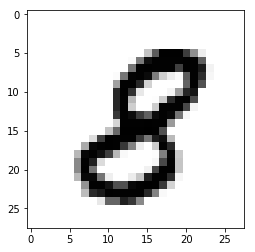

In [11]:
shdig(xl[5])

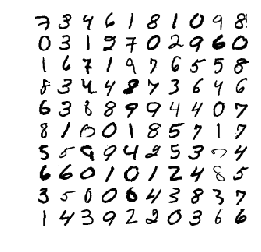

In [12]:
plt.imshow(-np.bmat([[ x.reshape(28,28) for x in xl[10*k:10*(k+1)] ] 
                     for k in range(10)]),'gray'); plt.axis('off');

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


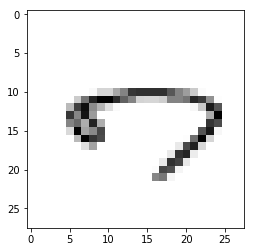

In [13]:
shdig(xl[68])
print(yl[68])
print(cl[68])

## gaussian classifier

Usamos scikit-learn para construir un clasificador basado clases gaussianas y reducción de dimensión mediante componentes principales (PCA).

In [14]:
from sklearn import random_projection, decomposition, naive_bayes, discriminant_analysis
from sklearn.metrics import confusion_matrix

def acc(maq,x,y):
    return 100*(y == maq.predict(x)).sum() / len(y)

In [15]:
#transformer = random_projection.GaussianRandomProjection(n_components=60).fit(xl)
transformer = decomposition.PCA(n_components=40).fit(xl)

In [16]:
xrl = transformer.transform(xl)
xrt = transformer.transform(xt)

Un clasificador "naive Bayes" tiene más de un 12% de errores, mientras que el gaussiano completo consigue menos de 4%:

In [17]:
gnb = naive_bayes.GaussianNB()

In [18]:
maq = gnb.fit(xrl, cl)

In [19]:
acc(maq,xrt,ct)

87.5

In [20]:
maq = discriminant_analysis.QuadraticDiscriminantAnalysis().fit(xrl,cl)

In [21]:
acc(maq,xrt,ct)

96.25

In [22]:
confusion_matrix(ct, maq.predict(xrt))

array([[ 972,    0,    0,    0,    0,    3,    0,    1,    4,    0],
       [   0, 1099,   11,    4,    1,    1,    1,    0,   18,    0],
       [   3,    0, 1004,    4,    2,    0,    3,    1,   15,    0],
       [   1,    0,    8,  973,    0,    7,    0,    2,   14,    5],
       [   2,    0,    5,    0,  963,    0,    2,    1,    3,    6],
       [   3,    0,    0,   24,    0,  857,    1,    0,    5,    2],
       [   7,    1,    1,    0,    3,   15,  924,    0,    7,    0],
       [   0,    4,   29,    2,    1,    4,    0,  954,   15,   19],
       [   3,    0,    8,   14,    2,    5,    1,    2,  929,   10],
       [   4,    0,   12,    6,    9,    3,    0,    8,   17,  950]])

Podemos clasificar cualquier imagen en el formato 28x28 adecuado:

array([8])

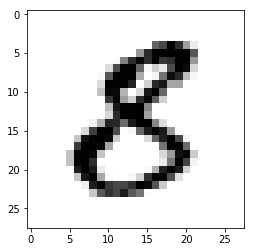

In [23]:
dig = xt[1234]

shdig(dig)

maq.predict(transformer.transform(dig.reshape(1,-1)))

(Se hace `reshape` porque la máquina clasifica conjuntos de vectores de características como filas de una matriz.)

## imagen real

Para que los clasificadores funcionen bien con imágenes reales es necesario [normalizarlas](http://yann.lecun.com/exdb/mnist/) para que tengan el mismo tamaño y posición que los ejemplos de entrenamiento.

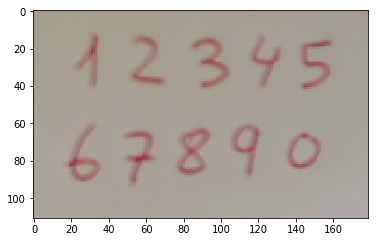

In [25]:
import cv2 as cv

digits = cv.cvtColor(cv.imread('../images/mydigits.png'),cv.COLOR_BGR2RGB);
plt.imshow(digits);

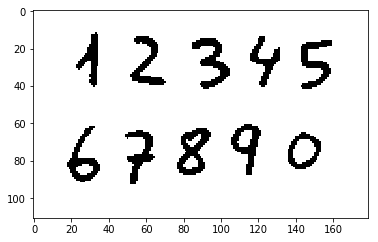

In [26]:
ret, gt = cv.threshold(cv.cvtColor(digits,cv.COLOR_RGB2GRAY),189,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(gt,'gray');

In [27]:
def center(p):
    r,c = p.shape
    rs = np.outer(range(r),np.ones(c))
    cs = np.outer(np.ones(r),range(c))
    s = np.sum(p)
    my  = np.sum(p*rs) / s
    mx  = np.sum(p*cs) / s
    return mx,my

def boundingBox(c):
    (x1, y1), (x2, y2) = c.min(0), c.max(0)
    return (x1, y1), (x2, y2)

def adaptsize(x):
    h,w = x.shape
    s = max(h,w)
    h2 = (s-h)//2
    w2 = (s-w)//2
    if h2==0:
        z1 = np.zeros([s,w2])
        z2 = np.zeros([s,s-w-w2])
        y  = np.hstack([z1,x,z2])
    else:
        z1 = np.zeros([h2,s])
        z2 = np.zeros([s-h-h2,s])
        y  = np.vstack([z1,x,z2])
    y = cv.resize(y,(20,20))/255
    mx,my = center(y)
    H = np.array([[1.,0,4-(mx-9.5)],[0,1,4-(my-9.5)]])
    return cv.warpAffine(y,H,(28,28))

In [28]:
a,contours,b = cv.findContours(255-gt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
ok = [ boundingBox(x.reshape(len(x),2)) for x in contours ]
ok = [ adaptsize(255-gt[y1:y2,x1:x2]) for (x1,y1),(x2,y2) in ok ]

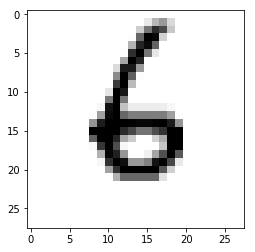

In [29]:
plt.imshow(-ok[3],'gray');

Una vez hecho esto se pueden utilizar con el clasificador igual que antes:

array([7])

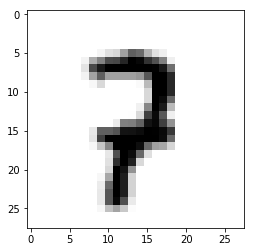

In [30]:
dig = ok[1].flatten()

shdig(dig)

maq.predict(transformer.transform(dig.reshape(1,-1)))

array([0, 7, 8, 6, 9, 5, 3, 4, 2, 4])

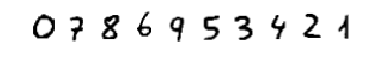

In [31]:
digits = np.array(ok).reshape(-1,28*28)

plt.imshow(-np.hstack([x.reshape(28,28) for x in ok]),'gray'); plt.axis('off');

maq.predict(transformer.transform(digits))

## regularización

Para conseguir **generalización** es necesario [controlar la capacidad](regularization.ipynb) de la máquinas de aprendizaje.

## pendiente

### ilustración PCA

### generación de muestras

### ejemplos "adversariales"

## otras máquinas

### naive Bayes modificado

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

maq = gnb.fit(xl, cl)

In [39]:
acc(maq,xt,ct)

55.58

In [40]:
maq.predict(digits)

array([0, 9, 8, 6, 9, 8, 3, 8, 6, 6])

In [41]:
maq.sigma_ = maq.sigma_ * 0 + 1

In [42]:
acc(maq,xt,ct)

82.05

In [43]:
maq.predict(digits)

array([0, 2, 8, 6, 9, 5, 3, 9, 2, 1])

### support vector machine (SVM)

In [44]:
from sklearn import svm

classifier = svm.SVC(gamma=0.01, C=0.1)
#classifier = svm.SVC(gamma=0.001)

classifier.kernel

'rbf'

In [45]:
maq = classifier.fit(xl[:5000], cl[:5000])

maq.support_vectors_.shape

(3731, 784)

In [46]:
acc(maq,xt,ct)

90.9

In [47]:
maq.predict(digits)

array([0, 2, 8, 6, 9, 5, 3, 4, 2, 1])

In [39]:
#import pickle
#s = pickle.dumps(maq)

In [40]:
#from sklearn.externals import joblib
#joblib.dump(maq, 'svm.pkl') 

['svm.pkl']

In [41]:
#maq = joblib.load('svm.pkl') 

### Gradient Boosting

In [24]:
from sklearn import ensemble

In [39]:
clf = ensemble.GradientBoostingClassifier(subsample=0.1, n_estimators=50, max_features=50, min_samples_split=10)

clf.fit(xl, cl)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=50, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=0.1, verbose=0,
              warm_start=False)

In [40]:
clf.score(xl,cl), clf.score(xt,ct)

(0.9142166666666667, 0.9137)

### Random Forest

In [52]:
clf = ensemble.RandomForestClassifier(n_estimators=100,n_jobs=-1)

clf.fit(xl, cl)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
clf.score(xl,cl), clf.score(xt,ct)

(1.0, 0.9696)

### CNN

Red convolucional profunda (ver [deep learning](tensorflow.ipynb)).

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Softmax, Flatten

model = Sequential()
model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(5,5), strides=1,
                 padding='same', use_bias=True, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=1,
                 padding='same', use_bias=True, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [36]:
if False:
    model.fit(xl.reshape(-1,28,28,1), yl, epochs=50, batch_size=500)
    #model.save('digits.keras')
else:
    #wget https://robot.inf.um.es/material/va/digits.keras
    model.load_weights('../data/models/digits.keras')
    
model.evaluate(xt.reshape(-1,28,28,1),yt, batch_size=500)

10000/10000 [==============================] - 8s 767us/step


[0.028063314117025583, 0.9907000005245209]

array([0, 7, 8, 6, 9, 5, 3, 4, 2, 1])

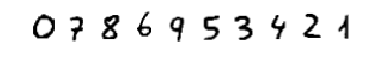

In [37]:
plt.imshow(-np.hstack([x.reshape(28,28) for x in ok]),'gray'); plt.axis('off');

model.predict_classes(np.array(ok).reshape(-1,28,28,1))